In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from math import exp, pi
import scipy.stats as stats

In [ ]:
# @title
def gauss(x):
    return exp(-x ** 2 / 2)

In [ ]:
def laplace(x):
    if x > 0:
        n = 100000
        s = 0
        for i in range(n):
            s += gauss(i * x / n) * x / n
        s /= (2 * pi) ** 0.5
        return s
    else:
        x *= -1
        n = 10000
        s = 0
        for i in range(n):
            s += gauss(i * x / n) * x / n
        s /= (2 * pi) ** 0.5
        return -s

In [ ]:
data = [2000, 2156, 2273, 2150, 2030, 2160, 2280, 2270, 2140, 2230, 2290,
2145, 2250, 2150, 2300, 2156, 2310, 2145, 2090, 2190, 2090, 2200,
2770, 2185, 2000, 2170, 2265, 2270, 2220, 2040, 2130, 2180, 2270,
2265, 2160, 2060, 2180, 2250, 2080, 2130, 2180, 2380, 2320,
2026, 2130, 2050, 2180, 2220, 2000, 2145, 2285, 2170, 2200, 2170,
2070, 2240, 2290, 2170, 2270, 2280, 2220, 2250, 2055, 2160, 2095,
2220, 2395, 2200, 2245, 2190, 2315, 2256, 2110, 2260, 2400, 2160,
2330, 2220, 2210, 2340, 2150, 2350, 2170, 2220, 2360, 2160, 2200,
2255, 2200, 2180, 2320, 2170, 2260, 2130, 2210, 2200, 2260, 2220,
2230, 2110, 2170, 2270, 2160, 2120, 2170, 2220, 2270, 2280, 2180,
2140, 2115, 2170, 2235, 2210, 2110, 2170, 2240, 2150, 2160, 2170,
2221, 2170, 2160, 2170, 2210, 2260, 2170, 2180, 2160, 2150, 2130,
2170, 2160, 2165, 2160, 2150, 2140, 2120, 2130, 2170]

In [ ]:
len(data)

140

In [ ]:
for i in range(len(data)):
    data[i] /= 100

1) Группируем выборку на 8 интервалов (ну или сколько захотим)



In [ ]:
num = 8  # кол-во интервалов
h = (max(data) - min(data)) / num  # ширина интервала
x_grid = [min(data) + (i-1) * h for i in range(num + 3)]  # сетка по х
intervals = [0] * num

In [ ]:
# создание данных для гистограммы
for i in data:
    if int((i - min(data)) / h) == num:
        intervals[num - 1] += 1
    else:
        intervals[int((i - min(data)) / h)] += 1

In [ ]:
intervals

[14, 64, 47, 12, 2, 0, 0, 1]

2) Построим полигон частот и гистограмму:

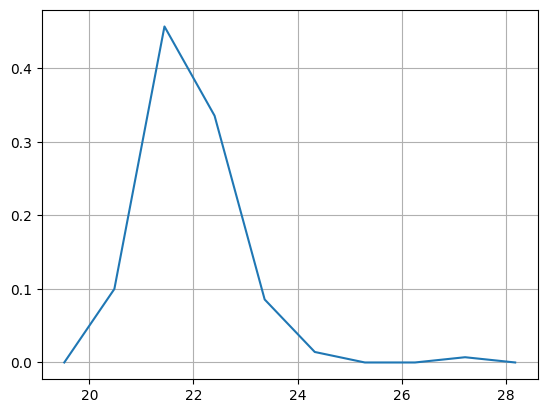

In [ ]:
# полигон частот
freqs = [intervals[i] / len(data) for i in range(num)]
freqs.insert(0, 0)
freqs.append(0)

X_grid = []
for i in range (len(x_grid) - 1):
    X_grid.append (x_grid[i] + h/2)
plt.plot(X_grid, freqs)

plt.grid()
plt.show()

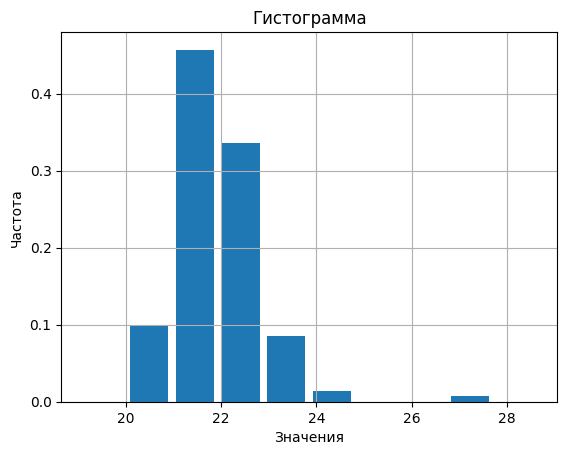

In [ ]:
plt.bar(X_grid, freqs)  # Метод bar() строит гистограмму
plt.xlabel("Значения")  # Название оси X
plt.ylabel("Частота")  # Название оси Y
plt.title("Гистограмма")  # Заголовок диаграммы
plt.grid()
plt.show()  # Отображение гистограммы

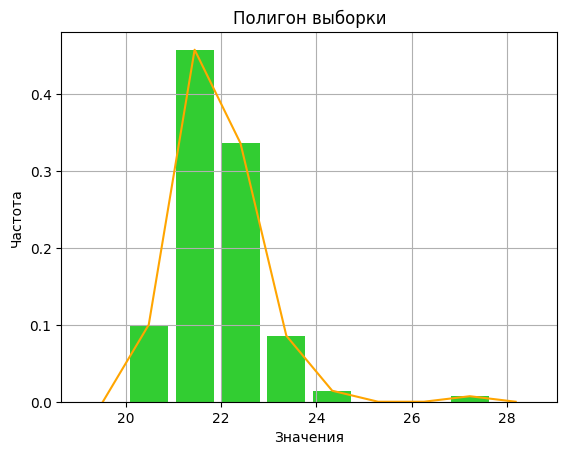

In [ ]:
plt.bar(X_grid, freqs, color = 'limegreen')  # Метод bar() строит гистограмму
plt.xlabel("Значения")  # Название оси X
plt.ylabel("Частота")  # Название оси Y
plt.title("Полигон выборки")  # Заголовок диаграммы
# гистограмма
# plt.hist(data, bins=num)

# полигон частот
plt.plot(X_grid, freqs, color = 'orange')
plt.grid()
plt.show()  # Отображение гистограммы

3) Найдем несмещенные оценки мат.ожидания и дисперсии

In [ ]:
Mx = sum(data)/len(data)
D0 = 0
for i in range(len(data)):
    D0+= (data[i] - Mx)**2
D0 = D0/(len(data)-1)
print("Несмещенная оценка мат.ожидания:", Mx, "\nНесмещенная оценка дисперсии:", D0)

Несмещенная оценка мат.ожидания: 21.960571428571413 
Несмещенная оценка дисперсии: 0.8571061459403903


In [ ]:
print()
# квантили для хи квадрат
print(chi2.ppf(0.05, 99))
print(chi2.ppf(0.95, 99))
new_x_grid = [(x_grid[i] - M) / S0 ** 0.5 for i in range(num + 1)]  # сетка для функции лапласа
# вероятности оказаться в интервале с помощью функции лапласа
p = [laplace(new_x_grid[i + 1]) - laplace(new_x_grid[i]) for i in range(num)]

'print()\n# квантили для хи квадрат\nprint(chi2.ppf(0.05, 99))\nprint(chi2.ppf(0.95, 99))\nnew_x_grid = [(x_grid[i] - M) / S0 ** 0.5 for i in range(num + 1)]  # сетка для функции лапласа\n# вероятности оказаться в интервале с помощью функции лапласа\np = [laplace(new_x_grid[i + 1]) - laplace(new_x_grid[i]) for i in range(num)]'

In [ ]:
# находим значение функции rho от выборки
ro = 0
for i in range(num):
    ro += (intervals[i] - len(data) * p[i]) ** 2 / len(data) / p[i]
print(ro)
# далее можно сравнить rho с квантилью распределения хи квадрат и сделать вывод о том, какая гипотеза верна'''

'# находим значение функции rho от выборки\nro = 0\nfor i in range(num):\n    ro += (intervals[i] - len(data) * p[i]) ** 2 / len(data) / p[i]\nprint(ro)\n# далее можно сравнить rho с квантилью распределения хи квадрат и сделать вывод о том, какая гипотеза верна'

4) Строим точечные оценки параметров распределения методом моментов

Известно, что для случайной величины $X$ ~ $N(a,b)$:
<br><br>$MX = (a+b)/2$ <br><br>
$DX = (b-a)^2/12$<br><br>

In [ ]:
x_otl = []
n_otl = []
for i in data:
    if i not in x_otl:
        x_otl.append(i)
x_otl = sorted(x_otl)
for i in sorted(x_otl):
    s = 0
    for j in data:
        if i == j:
            s+=1
    n_otl.append(s)
    s = 0

In [ ]:
print(x_otl)
print(n_otl)
print(sum(n_otl))

[20.0, 20.26, 20.3, 20.4, 20.5, 20.55, 20.6, 20.7, 20.8, 20.9, 20.95, 21.1, 21.15, 21.2, 21.3, 21.4, 21.45, 21.5, 21.56, 21.6, 21.65, 21.7, 21.8, 21.85, 21.9, 22.0, 22.1, 22.2, 22.21, 22.3, 22.35, 22.4, 22.45, 22.5, 22.55, 22.56, 22.6, 22.65, 22.7, 22.73, 22.8, 22.85, 22.9, 23.0, 23.1, 23.15, 23.2, 23.3, 23.4, 23.5, 23.6, 23.8, 23.95, 24.0, 27.7]
[3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 6, 3, 3, 6, 2, 11, 1, 16, 7, 1, 2, 6, 4, 8, 1, 2, 1, 2, 1, 3, 1, 1, 4, 2, 6, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
140


In [ ]:
XNi = 0
X2Ni = 0
for i in range(len(x_otl)):
    XNi+= (x_otl[i]*n_otl[i])
    X2Ni+= ((x_otl[i]**2)*n_otl[i])
Mx1 = XNi/sum(n_otl)
Dx1 = X2Ni/sum(n_otl) - (Mx1**2)
#print(XNi, X2Ni, Mx1, Dx1)

Решая систему, получаем для параметров следующие выражения: <br>
$a1=Mx_1-sqrt(3*Dx_1)$ <br>
$b1=Mx_1+sqrt(3*Dx_1)$

In [ ]:
a1=Mx1-np.sqrt(3*Dx1)
b1=Mx1+np.sqrt(3*Dx1)
print("Точечная оценка параметра а методом моментов:",a1,"\nТочечная оценка параметра σ2 методом моментов:",b1)

Точечная оценка параметра а методом моментов: 20.362775484919563 
Точечная оценка параметра σ2 методом моментов: 23.558367372223298


5) Строим точечные оценки методом максимального правдоподобия

Для начала составим функцию правдоподобия:
$L(a,σ) = 1/(σ*sqrt(2π))^n*exp(-∑ (ξ_i - a)^2/(2σ^2))$ <br>
Тогда <br>
$ln L(a,σ) = -n*ln(σ) - n*ln(sqrt(2π) - ∑ (ξ_i - a)^2/(2σ^2))$
<br>
Из условий экстремума (частная производная lnL по а = 0 и частная производная lnL по σ = 0), получим: <br>
$a = 1/n * ∑ ξ_i$ <br>
$σ^2 = 1/n *  ∑ (ξ_i - a)^2$

In [ ]:
a2 = sum(data)/len(data)
x_a = []
for i in range (len(data)):
  x_a.append((data[i] - a2)**2)
b2 = sum(x_a)/len(x_a)
print("Точечная оценка параметра а методом максимального правдоподобия:",a2,
      "\nТочечная оценка параметра σ2 методом максимального правдоподобия:",b2)

Точечная оценка параметра а методом максимального правдоподобия: 21.960571428571413 
Точечная оценка параметра σ2 методом максимального правдоподобия: 0.8509839591836732


6) Ищем доверительные интервалы для мат.ожидания и дисперсии случайной величины с надежностью 0.9

Всего измерений n = 101 <br>
Надежность: 0.9 <br>
Значение коэффициента Стьюдента $t_{101,0.9} = 1.66023432606575$ <br>
Мат.ожидание: <br>
$a - t*σ/sqrt(n) < ~a~ <a + t*σ/sqrt(n) $

In [ ]:
t = 1.66023432606575
a_left = Mx - t * np.sqrt(D0/len(data))
a_right = Mx + t * np.sqrt(D0/len(data))
print("(", a_left, ",",a_right, ")")

( 21.830667383234402 , 22.090475473908423 )


Дисперсия<br>
Найдём величину $χ^2$ для значений α = 0.05 и α = 0.95

In [ ]:
chi1 = stats.distributions.chi2.ppf(0.05, len(data))
chi2 = stats.distributions.chi2.ppf(0.95, len(data))

Доверительный интервал для дисперсии: <br>
$n*σ_в^2/χ_{α2,n} <~σ~<n*σ_в^2/χ_{α1,n}$

In [ ]:
sig_left = len(data)*b2/chi2
sig_right = len(data)*b2/chi1
print("(", sig_left, ",",sig_right, ")")

( 0.7065753329160739 , 1.0482003290032436 )


In [ ]:
Mx

21.960571428571413

7) Сформулируем нулевую гипотезу $H_0$ и проверим ее, пользуясь критерием Пирсона при уровне значимости 0.05

Нулевая гипотеза: предполагаем, что $H_0$ = {нагрузка на разрыв в одном из 10 случаев будет 10,4, а в остальных 11,7}

In [ ]:
'''x_H0 = M

chi_square_result = stats.chisquare(f_obs=data, f_exp=x_H0)
print(chi_square_result)'''

'x_H0 = M\n\nchi_square_result = stats.chisquare(f_obs=data, f_exp=x_H0)\nprint(chi_square_result)'

In [ ]:
x_H0 = []
for i in range(len(data)-10):
    x_H0.append(11.7)
for i in range(10):
    x_H0.append(10.4)

In [ ]:
# @title
stats.chisquare(f_obs=data, f_exp=x_H0)

ValueError: ignored

Значение p почти 1, что больше уровня значимости 0.05, значит, отвергаем нулевую гипотезу